In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
import xgboost as xgb

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
df=pd.read_csv("online_shoppers_intention.csv")


In [15]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [16]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [17]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [18]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Administrative'>

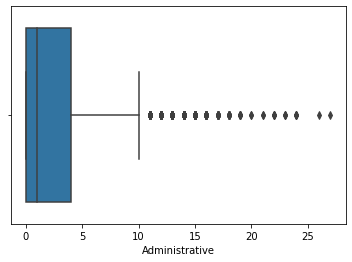

In [19]:
sns.boxplot(df['Administrative'])

In [20]:
q1=df['Administrative'].quantile(0.25)

In [21]:
q3=df['Administrative'].quantile(0.75)

In [22]:
IQR=q3-q1

In [23]:
lower=q1-1.5*IQR

In [24]:
upper=q3+1.5*IQR

In [25]:
df=df[(df['Administrative']>lower) & (df['Administrative']<upper)]

In [26]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Administrative_Duration'>

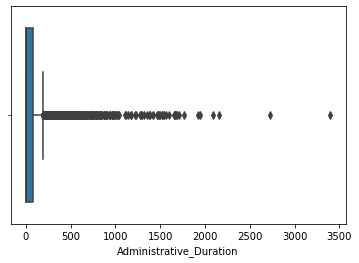

In [27]:
sns.boxplot(df['Administrative_Duration'])

In [28]:
q1=df['Administrative_Duration'].quantile(0.25)

In [29]:
q3=df['Administrative_Duration'].quantile(0.75)

In [30]:
IQR=q3-q1

In [31]:
lower=q1-1.5*IQR

In [32]:
upper=q3+1.5*IQR

In [33]:
df=df[(df['Administrative_Duration']>lower) & (df['Administrative_Duration']<upper)]

In [34]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProductRelated'>

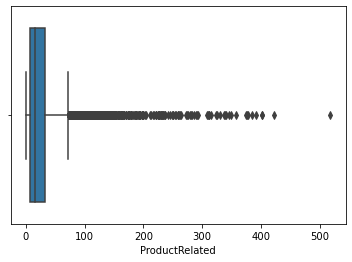

In [35]:
sns.boxplot(df['ProductRelated'])

In [36]:
q1=df['ProductRelated'].quantile(0.25)

In [37]:
q3=df['ProductRelated'].quantile(0.75)

In [38]:
IQR=q3-q1

In [39]:
lower=q1-1.5*IQR

In [40]:
upper=q3+1.5*IQR

In [41]:
df=df[(df['ProductRelated']>lower) & (df['ProductRelated']<upper)]

In [42]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProductRelated_Duration'>

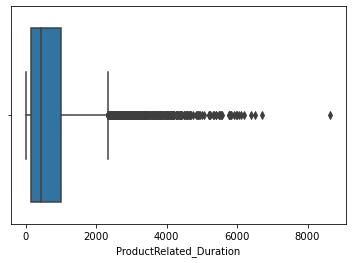

In [43]:
sns.boxplot(df['ProductRelated_Duration'])

In [44]:
q1=df['ProductRelated_Duration'].quantile(0.25)

In [45]:
q3=df['ProductRelated_Duration'].quantile(0.75)

In [46]:
IQR=q3-q1

In [47]:
lower=q1-1.5*IQR

In [48]:
upper=q3+1.5*IQR

In [49]:
df=df[(df['ProductRelated_Duration']>lower) & (df['ProductRelated_Duration']<upper)]

In [50]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BounceRates'>

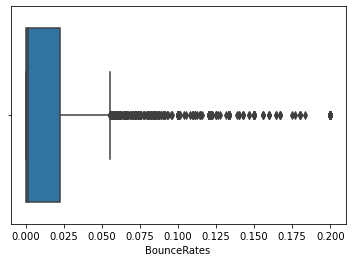

In [51]:
sns.boxplot(df['BounceRates'])

In [52]:
q1=df['BounceRates'].quantile(0.25)

In [53]:
q3=df['BounceRates'].quantile(0.75)

In [54]:
IQR=q3-q1

In [55]:
lower=q1-1.5*IQR

In [56]:
upper=q3+1.5*IQR

In [57]:
df=df[(df['BounceRates']>lower) & (df['BounceRates']<upper)]

In [58]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.000000,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0,0.0,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ExitRates'>

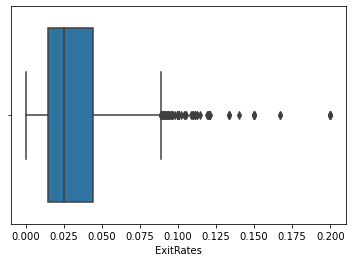

In [59]:
sns.boxplot(df['ExitRates'])

In [60]:
q1=df['ExitRates'].quantile(0.25)

In [61]:
q3=df['ExitRates'].quantile(0.75)

In [62]:
IQR=q3-q1

In [63]:
lower=q1-1.5*IQR

In [64]:
upper=q3+1.5*IQR

In [65]:
df=df[(df['ExitRates']>lower) & (df['ExitRates']<upper)]

In [66]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False
10,0,0.0,0,0.0,3,395.000000,0.000000,0.066667,0.000000,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
11,0,0.0,0,0.0,16,407.750000,0.018750,0.025833,0.000000,0.4,Feb,1,1,4,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0,0.0,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OperatingSystems'>

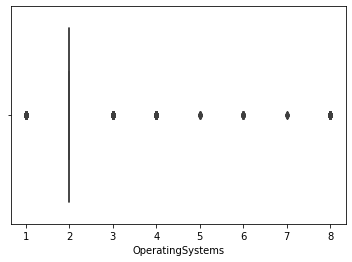

In [67]:
sns.boxplot(df['OperatingSystems'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region'>

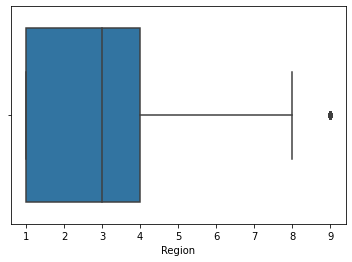

In [68]:
sns.boxplot(df['Region'])

In [69]:
q1=df['Region'].quantile(0.25)

In [70]:
q3=df['Region'].quantile(0.75)

In [71]:
IQR=q3-q1

In [72]:
lower=q1-1.5*IQR

In [73]:
upper=q3+1.5*IQR

In [74]:
df=df[(df['Region']>lower) & (df['Region']<upper)]

In [75]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False
10,0,0.0,0,0.0,3,395.000000,0.000000,0.066667,0.000000,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
11,0,0.0,0,0.0,16,407.750000,0.018750,0.025833,0.000000,0.4,Feb,1,1,4,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0,0.0,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TrafficType'>

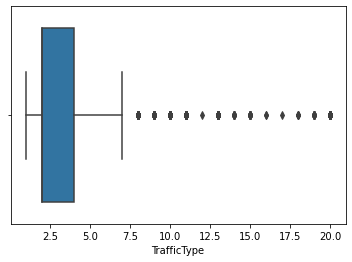

In [76]:
sns.boxplot(df['TrafficType'])

In [77]:
q1=df['TrafficType'].quantile(0.25)

In [78]:
q3=df['TrafficType'].quantile(0.75)

In [79]:
IQR=q3-q1

In [80]:
lower=q1-1.5*IQR

In [81]:
upper=q3+1.5*IQR

In [82]:
df=df[(df['TrafficType']>lower) & (df['TrafficType']<upper)]

In [83]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4,0,0.00,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.00,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
9,0,0.00,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False
10,0,0.00,0,0.0,3,395.000000,0.000000,0.066667,0.000000,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
11,0,0.00,0,0.0,16,407.750000,0.018750,0.025833,0.000000,0.4,Feb,1,1,4,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12320,0,0.00,0,0.0,8,143.583333,0.014286,0.050000,0.000000,0.0,Nov,2,2,3,1,Returning_Visitor,False,False
12322,6,76.25,0,0.0,22,1075.250000,0.000000,0.004167,0.000000,0.0,Dec,2,2,4,2,Returning_Visitor,False,False
12324,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12325,3,145.00,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Browser'>

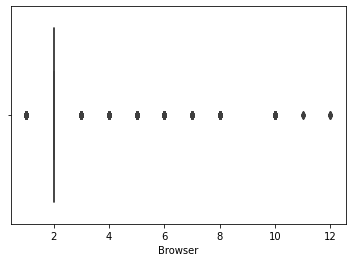

In [84]:
sns.boxplot(df['Browser'])

In [85]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4,0,0.00,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.00,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
9,0,0.00,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False
10,0,0.00,0,0.0,3,395.000000,0.000000,0.066667,0.000000,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
11,0,0.00,0,0.0,16,407.750000,0.018750,0.025833,0.000000,0.4,Feb,1,1,4,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12320,0,0.00,0,0.0,8,143.583333,0.014286,0.050000,0.000000,0.0,Nov,2,2,3,1,Returning_Visitor,False,False
12322,6,76.25,0,0.0,22,1075.250000,0.000000,0.004167,0.000000,0.0,Dec,2,2,4,2,Returning_Visitor,False,False
12324,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12325,3,145.00,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False


<AxesSubplot:xlabel='TrafficType', ylabel='count'>

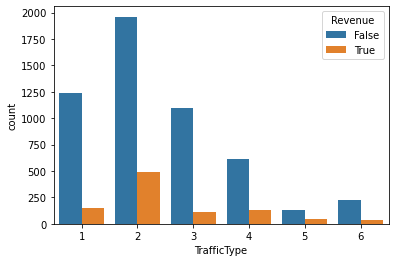

In [86]:
sns.countplot(x=df['TrafficType'],hue=df['Revenue'])

<AxesSubplot:xlabel='Weekend', ylabel='count'>

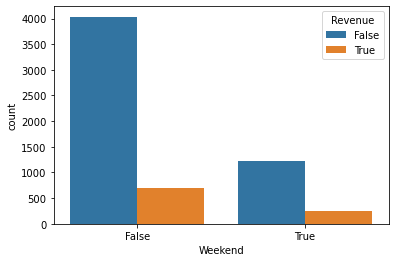

In [87]:
sns.countplot(x=df['Weekend'],hue=df['Revenue'])

<AxesSubplot:xlabel='VisitorType', ylabel='count'>

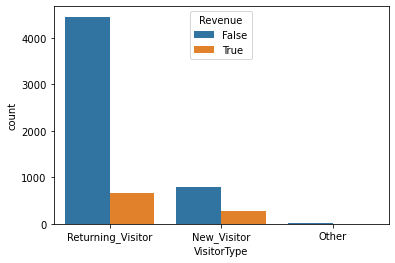

In [88]:
sns.countplot(x=df['VisitorType'],hue=df['Revenue'])

<AxesSubplot:xlabel='Region', ylabel='count'>

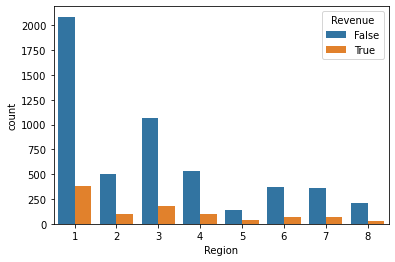

In [89]:
sns.countplot(x=df['Region'],hue=df['Revenue'])

<AxesSubplot:xlabel='Browser', ylabel='count'>

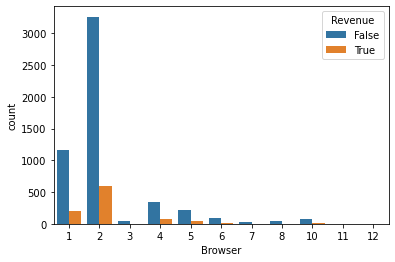

In [90]:
sns.countplot(x=df['Browser'],hue=df['Revenue'])

<AxesSubplot:xlabel='OperatingSystems', ylabel='count'>

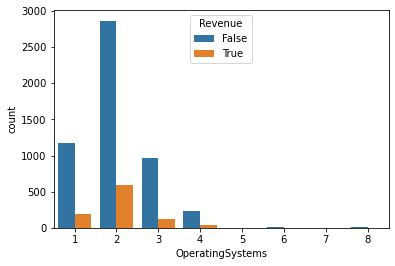

In [91]:
sns.countplot(x=df['OperatingSystems'],hue=df['Revenue'])

<AxesSubplot:xlabel='Month', ylabel='count'>

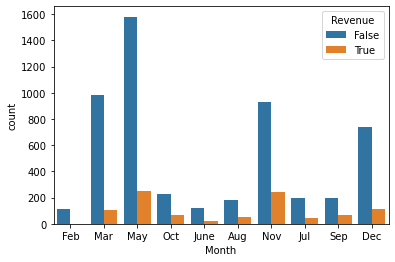

In [92]:
sns.countplot(x=df['Month'],hue=df['Revenue'])

<AxesSubplot:xlabel='SpecialDay', ylabel='count'>

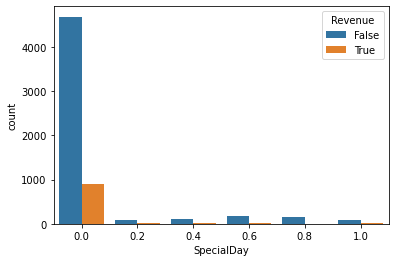

In [93]:
sns.countplot(x=df['SpecialDay'],hue=df['Revenue'])

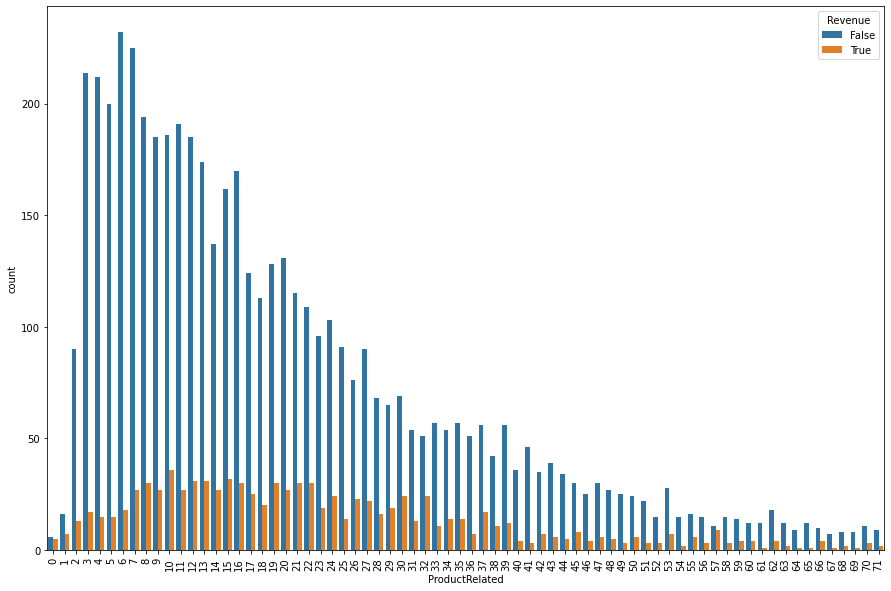

In [94]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['ProductRelated'],hue=df['Revenue'])
plt.xticks(rotation=90)
plt.show()

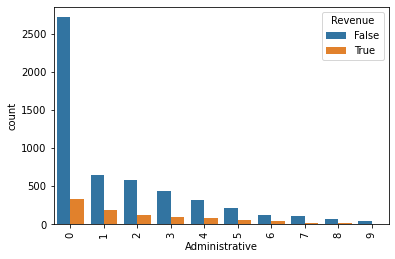

In [95]:
sns.countplot(x=df['Administrative'],hue=df['Revenue'])
plt.xticks(rotation=90)
plt.show()

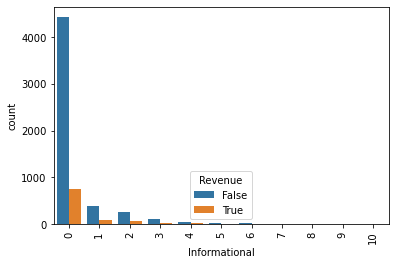

In [96]:

sns.countplot(x=df['Informational'],hue=df['Revenue'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Revenue', ylabel='ProductRelated_Duration'>

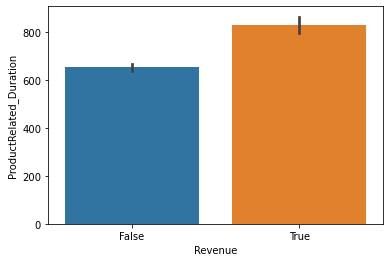

In [97]:
sns.barplot(x=df['Revenue'],y=df['ProductRelated_Duration'])

<AxesSubplot:xlabel='Revenue', ylabel='BounceRates'>

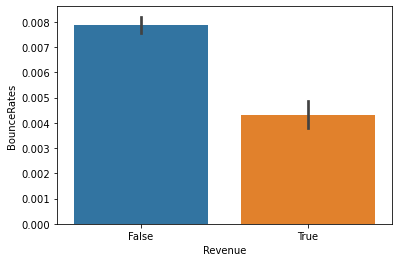

In [98]:
sns.barplot(x=df['Revenue'],y=df['BounceRates'])

<AxesSubplot:xlabel='Revenue', ylabel='ExitRates'>

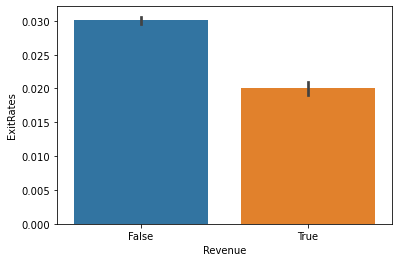

In [99]:
sns.barplot(x=df['Revenue'],y=df['ExitRates'])

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

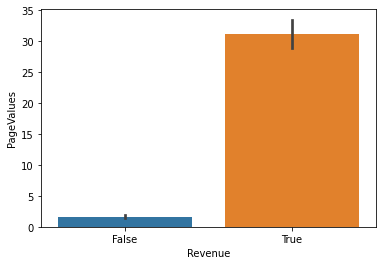

In [100]:
sns.barplot(x=df['Revenue'],y=df['PageValues'])

<AxesSubplot:xlabel='Revenue', ylabel='Informational_Duration'>

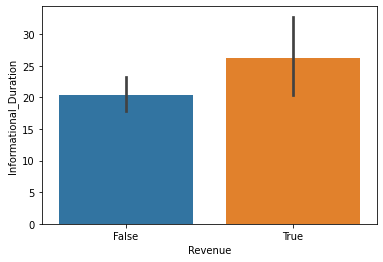

In [101]:
sns.barplot(x=df['Revenue'],y=df['Informational_Duration'])

<AxesSubplot:xlabel='Revenue', ylabel='Administrative_Duration'>

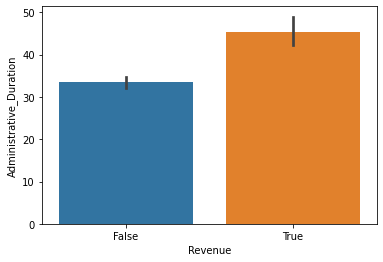

In [102]:
sns.barplot(x=df['Revenue'],y=df['Administrative_Duration'])

<AxesSubplot:xlabel='Revenue', ylabel='Administrative_Duration'>

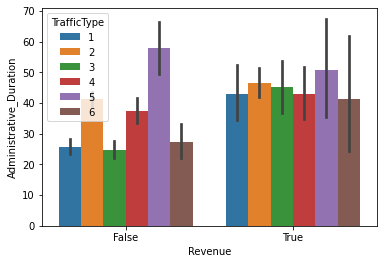

In [103]:
sns.barplot(x=df['Revenue'],y=df['Administrative_Duration'],hue=df['TrafficType'])

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

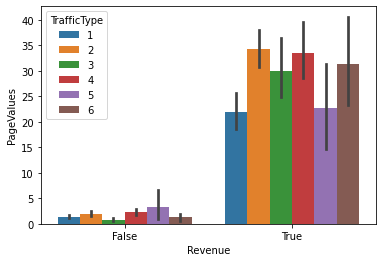

In [104]:
sns.barplot(x=df['Revenue'],y=df['PageValues'],hue=df['TrafficType'])

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

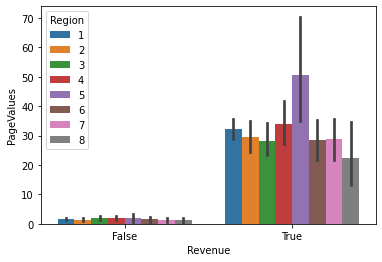

In [105]:
sns.barplot(x=df['Revenue'],y=df['PageValues'],hue=df['Region'])

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

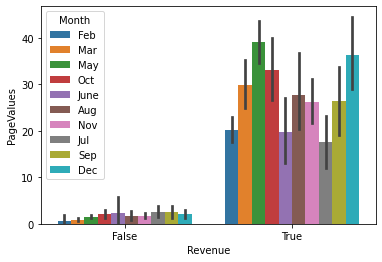

In [106]:
sns.barplot(x=df['Revenue'],y=df['PageValues'],hue=df['Month'])

<AxesSubplot:xlabel='Revenue', ylabel='ExitRates'>

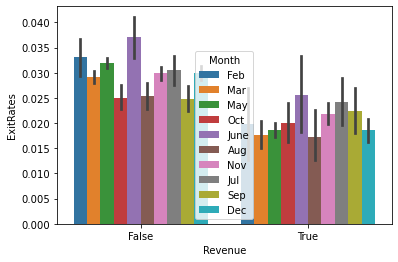

In [107]:
sns.barplot(x=df['Revenue'],y=df['ExitRates'],hue=df['Month'])

<AxesSubplot:xlabel='Revenue', ylabel='BounceRates'>

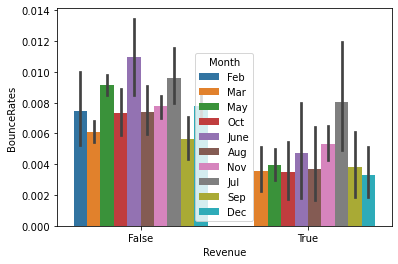

In [108]:
sns.barplot(x=df['Revenue'],y=df['BounceRates'],hue=df['Month'])

<AxesSubplot:xlabel='Revenue', ylabel='BounceRates'>

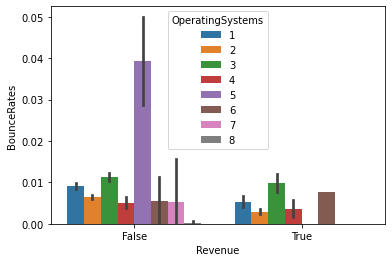

In [109]:
sns.barplot(x=df['Revenue'],y=df['BounceRates'],hue=df['OperatingSystems'])

<AxesSubplot:xlabel='Revenue', ylabel='ProductRelated_Duration'>

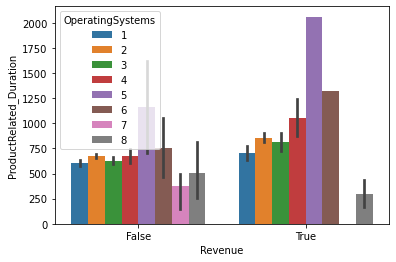

In [110]:
sns.barplot(x=df['Revenue'],y=df['ProductRelated_Duration'],hue=df['OperatingSystems'])

<AxesSubplot:xlabel='Revenue', ylabel='ProductRelated_Duration'>

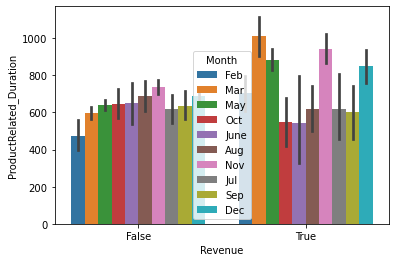

In [111]:
sns.barplot(x=df['Revenue'],y=df['ProductRelated_Duration'],hue=df['Month'])

<AxesSubplot:xlabel='Revenue', ylabel='BounceRates'>

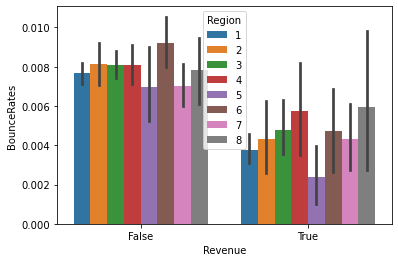

In [112]:
sns.barplot(x=df['Revenue'],y=df['BounceRates'],hue=df['Region'])

<AxesSubplot:xlabel='Revenue', ylabel='ExitRates'>

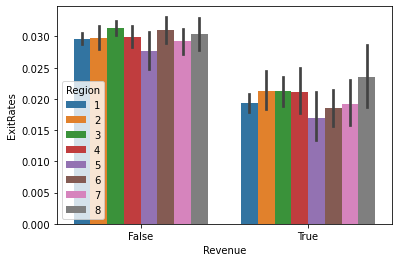

In [113]:
sns.barplot(x=df['Revenue'],y=df['ExitRates'],hue=df['Region'])

<AxesSubplot:xlabel='Revenue', ylabel='ExitRates'>

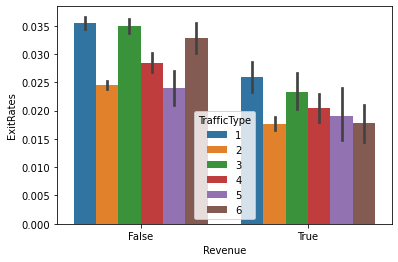

In [114]:
sns.barplot(x=df['Revenue'],y=df['ExitRates'],hue=df['TrafficType'])

<AxesSubplot:xlabel='Revenue', ylabel='ExitRates'>

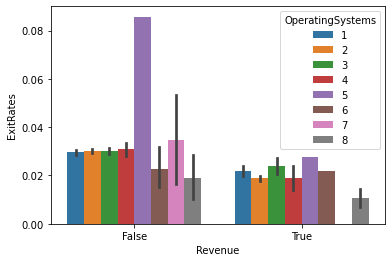

In [115]:
sns.barplot(x=df['Revenue'],y=df['ExitRates'],hue=df['OperatingSystems'])

<AxesSubplot:xlabel='Revenue', ylabel='BounceRates'>

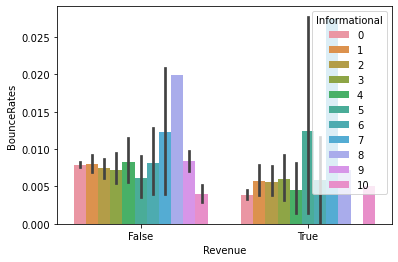

In [116]:
sns.barplot(x=df['Revenue'],y=df['BounceRates'],hue=df['Informational'])

<AxesSubplot:xlabel='Revenue', ylabel='ExitRates'>

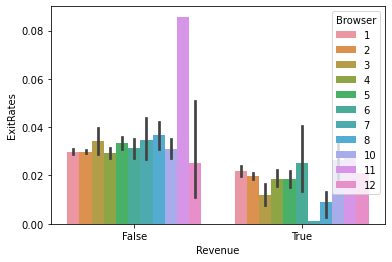

In [117]:
sns.barplot(x=df['Revenue'],y=df['ExitRates'],hue=df['Browser'])

<AxesSubplot:xlabel='Revenue', ylabel='ExitRates'>

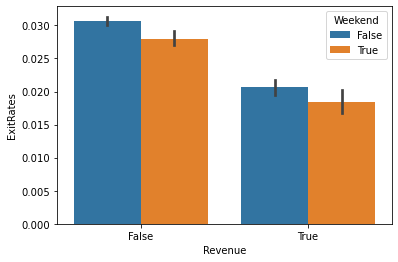

In [118]:
sns.barplot(x=df['Revenue'],y=df['ExitRates'],hue=df['Weekend'])

<AxesSubplot:xlabel='Month', ylabel='ExitRates'>

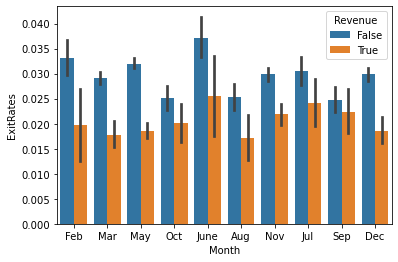

In [119]:
sns.barplot(x=df['Month'],y=df['ExitRates'],hue=df['Revenue'])

<AxesSubplot:xlabel='Month', ylabel='BounceRates'>

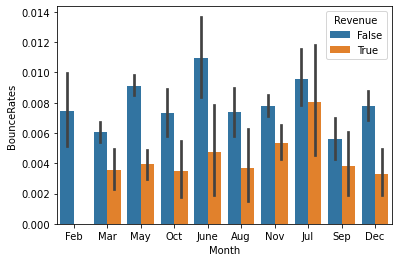

In [120]:
sns.barplot(x=df['Month'],y=df['BounceRates'],hue=df['Revenue'])

<AxesSubplot:xlabel='Month', ylabel='PageValues'>

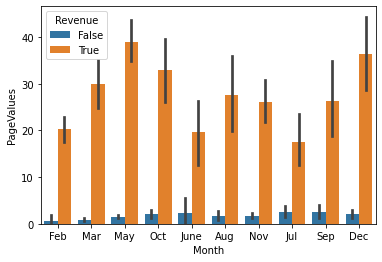

In [121]:
sns.barplot(x=df['Month'],y=df['PageValues'],hue=df['Revenue'])

<AxesSubplot:xlabel='Month', ylabel='ProductRelated_Duration'>

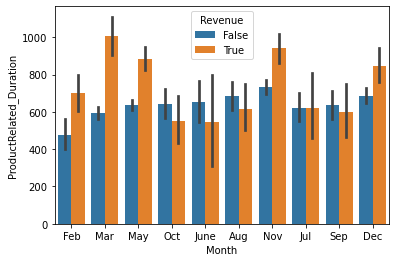

In [122]:
sns.barplot(x=df['Month'],y=df['ProductRelated_Duration'],hue=df['Revenue'])

<AxesSubplot:xlabel='Month', ylabel='Informational_Duration'>

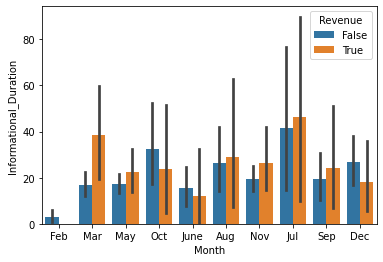

In [123]:
sns.barplot(x=df['Month'],y=df['Informational_Duration'],hue=df['Revenue'])

<AxesSubplot:xlabel='Month', ylabel='Administrative_Duration'>

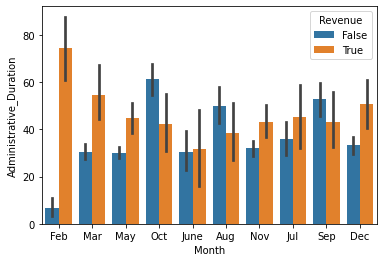

In [124]:
sns.barplot(x=df['Month'],y=df['Administrative_Duration'],hue=df['Revenue'])

<AxesSubplot:xlabel='Month', ylabel='SpecialDay'>

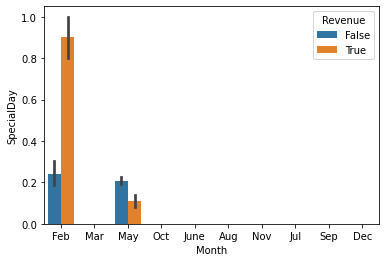

In [125]:
sns.barplot(x=df['Month'],y=df['SpecialDay'],hue=df['Revenue'])

<AxesSubplot:xlabel='Weekend', ylabel='SpecialDay'>

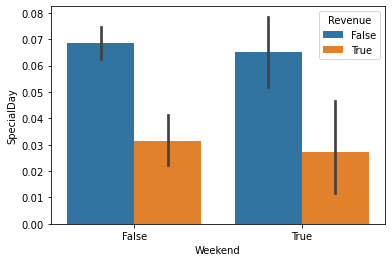

In [126]:
sns.barplot(x=df['Weekend'],y=df['SpecialDay'],hue=df['Revenue'])

<AxesSubplot:xlabel='Weekend', ylabel='Administrative_Duration'>

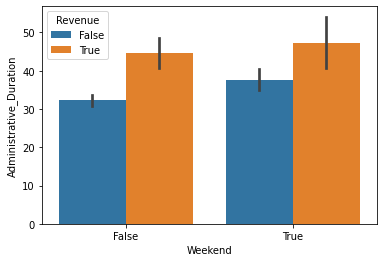

In [127]:
sns.barplot(x=df['Weekend'],y=df['Administrative_Duration'],hue=df['Revenue'])

<AxesSubplot:xlabel='Weekend', ylabel='Informational_Duration'>

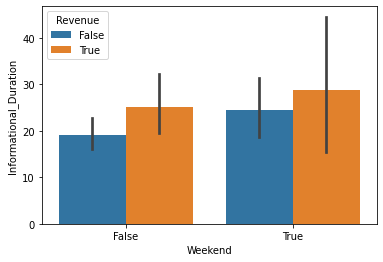

In [128]:
sns.barplot(x=df['Weekend'],y=df['Informational_Duration'],hue=df['Revenue'])

<AxesSubplot:xlabel='Weekend', ylabel='ProductRelated_Duration'>

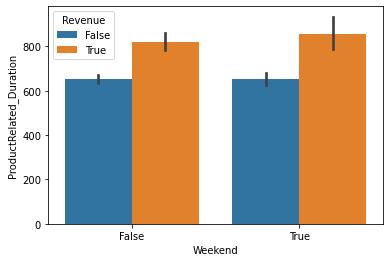

In [129]:
sns.barplot(x=df['Weekend'],y=df['ProductRelated_Duration'],hue=df['Revenue'])

<AxesSubplot:xlabel='Weekend', ylabel='PageValues'>

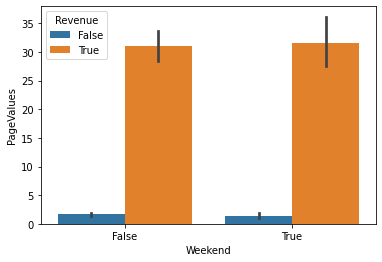

In [130]:
sns.barplot(x=df['Weekend'],y=df['PageValues'],hue=df['Revenue'])

<AxesSubplot:xlabel='Weekend', ylabel='BounceRates'>

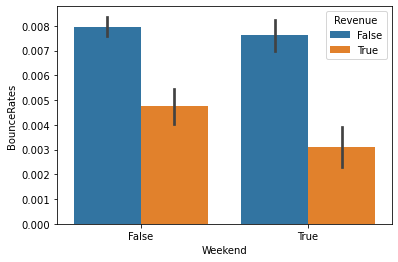

In [131]:
sns.barplot(x=df['Weekend'],y=df['BounceRates'],hue=df['Revenue'])

<AxesSubplot:xlabel='Weekend', ylabel='ExitRates'>

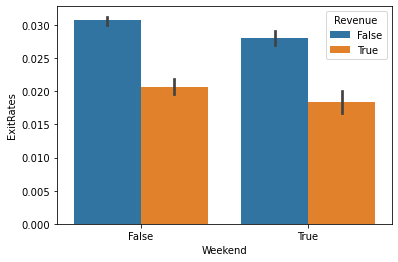

In [132]:
sns.barplot(x=df['Weekend'],y=df['ExitRates'],hue=df['Revenue'])

<AxesSubplot:xlabel='VisitorType', ylabel='ExitRates'>

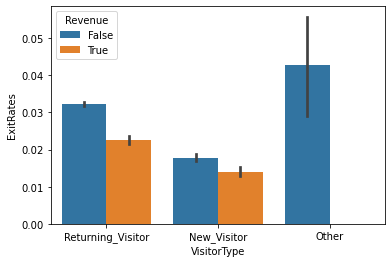

In [133]:
sns.barplot(x=df['VisitorType'],y=df['ExitRates'],hue=df['Revenue'])

<AxesSubplot:xlabel='VisitorType', ylabel='BounceRates'>

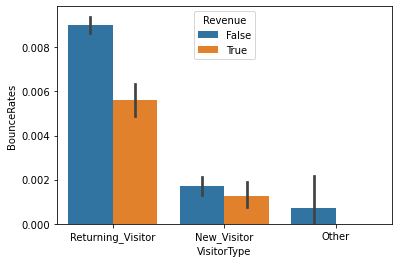

In [134]:
sns.barplot(x=df['VisitorType'],y=df['BounceRates'],hue=df['Revenue'])

<AxesSubplot:xlabel='VisitorType', ylabel='PageValues'>

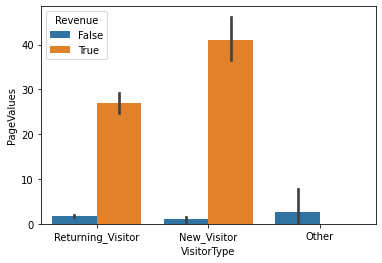

In [135]:
sns.barplot(x=df['VisitorType'],y=df['PageValues'],hue=df['Revenue'])

<AxesSubplot:xlabel='VisitorType', ylabel='ProductRelated_Duration'>

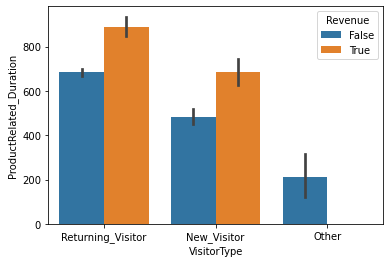

In [136]:
sns.barplot(x=df['VisitorType'],y=df['ProductRelated_Duration'],hue=df['Revenue'])

<AxesSubplot:xlabel='VisitorType', ylabel='Informational_Duration'>

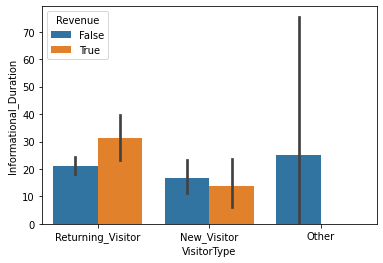

In [137]:
sns.barplot(x=df['VisitorType'],y=df['Informational_Duration'],hue=df['Revenue'])

<AxesSubplot:xlabel='VisitorType', ylabel='Administrative_Duration'>

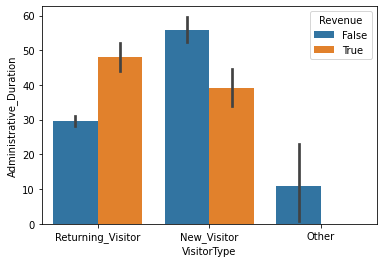

In [138]:
sns.barplot(x=df['VisitorType'],y=df['Administrative_Duration'],hue=df['Revenue'])

<AxesSubplot:xlabel='VisitorType', ylabel='SpecialDay'>

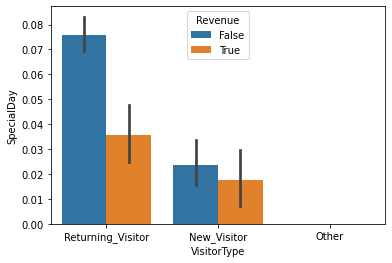

In [139]:
sns.barplot(x=df['VisitorType'],y=df['SpecialDay'],hue=df['Revenue'])

In [140]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4,0,0.00,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.00,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
9,0,0.00,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False
10,0,0.00,0,0.0,3,395.000000,0.000000,0.066667,0.000000,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
11,0,0.00,0,0.0,16,407.750000,0.018750,0.025833,0.000000,0.4,Feb,1,1,4,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12320,0,0.00,0,0.0,8,143.583333,0.014286,0.050000,0.000000,0.0,Nov,2,2,3,1,Returning_Visitor,False,False
12322,6,76.25,0,0.0,22,1075.250000,0.000000,0.004167,0.000000,0.0,Dec,2,2,4,2,Returning_Visitor,False,False
12324,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12325,3,145.00,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False


<AxesSubplot:xlabel='Revenue', ylabel='Administrative_Duration'>

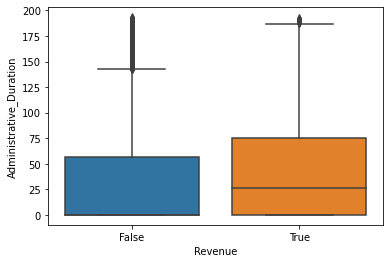

In [141]:
sns.boxplot(x=df['Revenue'],y=df['Administrative_Duration'])

<AxesSubplot:xlabel='Revenue', ylabel='Administrative_Duration'>

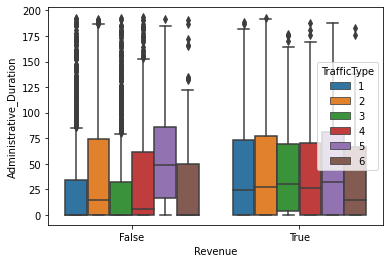

In [142]:
sns.boxplot(x=df['Revenue'],y=df['Administrative_Duration'],hue=df['TrafficType'])

<AxesSubplot:xlabel='Revenue', ylabel='Administrative_Duration'>

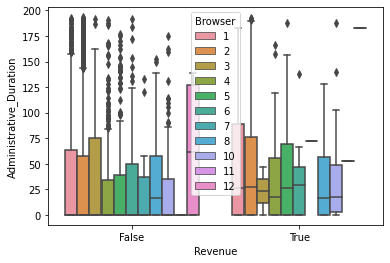

In [143]:
sns.boxplot(x=df['Revenue'],y=df['Administrative_Duration'],hue=df['Browser'])

<AxesSubplot:xlabel='Revenue', ylabel='Administrative_Duration'>

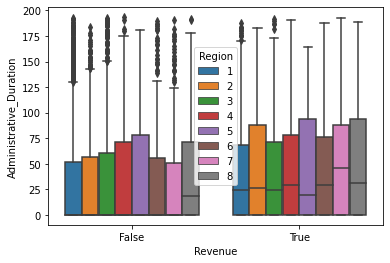

In [144]:
sns.boxplot(x=df['Revenue'],y=df['Administrative_Duration'],hue=df['Region'])

<AxesSubplot:xlabel='Revenue', ylabel='Administrative_Duration'>

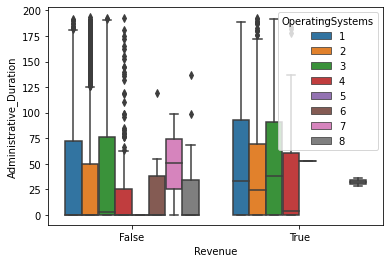

In [145]:

sns.boxplot(x=df['Revenue'],y=df['Administrative_Duration'],hue=df['OperatingSystems'])

<AxesSubplot:xlabel='Revenue', ylabel='Administrative_Duration'>

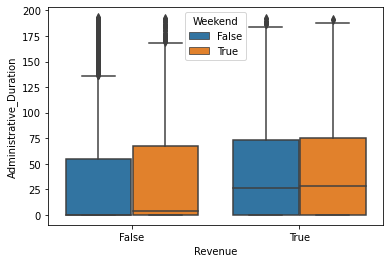

In [146]:
sns.boxplot(x=df['Revenue'],y=df['Administrative_Duration'],hue=df['Weekend'])

<AxesSubplot:xlabel='Revenue', ylabel='Administrative_Duration'>

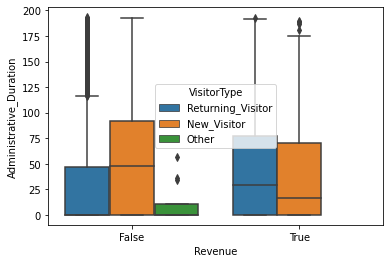

In [147]:
sns.boxplot(x=df['Revenue'],y=df['Administrative_Duration'],hue=df['VisitorType'])

<AxesSubplot:xlabel='Revenue', ylabel='ProductRelated_Duration'>

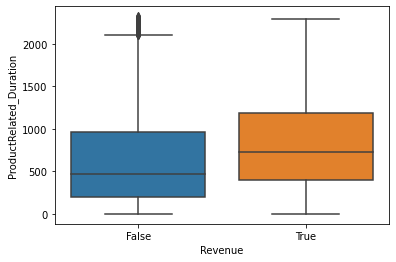

In [148]:
sns.boxplot(x=df['Revenue'],y=df['ProductRelated_Duration'])

<AxesSubplot:xlabel='Revenue', ylabel='ProductRelated_Duration'>

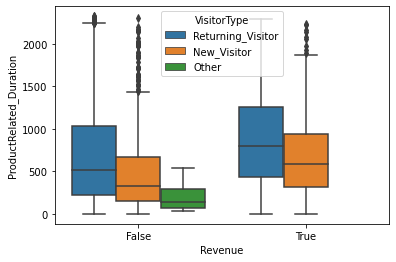

In [149]:
sns.boxplot(x=df['Revenue'],y=df['ProductRelated_Duration'],hue=df['VisitorType'])

<AxesSubplot:xlabel='Revenue', ylabel='ProductRelated_Duration'>

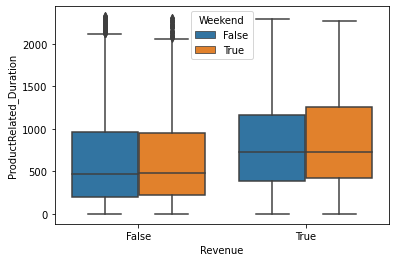

In [150]:
sns.boxplot(x=df['Revenue'],y=df['ProductRelated_Duration'],hue=df['Weekend'])

<AxesSubplot:xlabel='Revenue', ylabel='ProductRelated_Duration'>

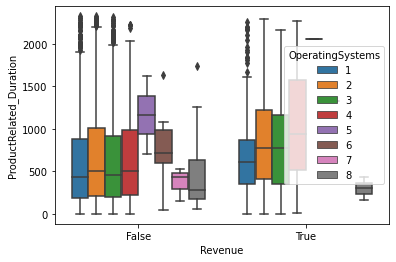

In [151]:
sns.boxplot(x=df['Revenue'],y=df['ProductRelated_Duration'],hue=df['OperatingSystems'])

<AxesSubplot:xlabel='Revenue', ylabel='BounceRates'>

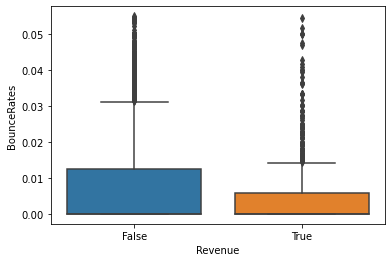

In [152]:
sns.boxplot(x=df['Revenue'],y=df['BounceRates'])

<AxesSubplot:xlabel='Revenue', ylabel='BounceRates'>

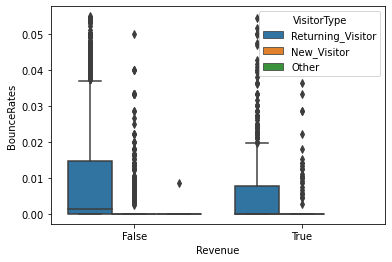

In [153]:
sns.boxplot(x=df['Revenue'],y=df['BounceRates'],hue=df['VisitorType'])

<AxesSubplot:xlabel='Revenue', ylabel='BounceRates'>

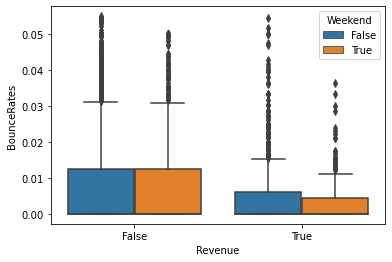

In [154]:
sns.boxplot(x=df['Revenue'],y=df['BounceRates'],hue=df['Weekend'])

<AxesSubplot:xlabel='Revenue', ylabel='BounceRates'>

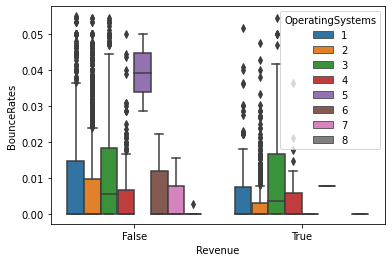

In [155]:
sns.boxplot(x=df['Revenue'],y=df['BounceRates'],hue=df['OperatingSystems'])

<AxesSubplot:xlabel='Revenue', ylabel='ExitRates'>

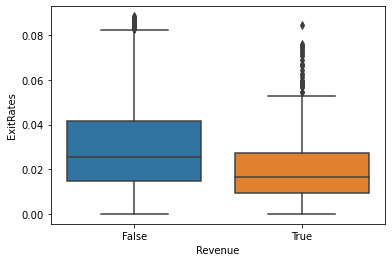

In [156]:
sns.boxplot(x=df['Revenue'],y=df['ExitRates'])

<AxesSubplot:xlabel='Revenue', ylabel='ExitRates'>

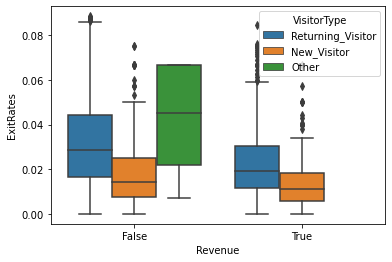

In [157]:
sns.boxplot(x=df['Revenue'],y=df['ExitRates'],hue=df['VisitorType'])

<AxesSubplot:xlabel='Revenue', ylabel='ExitRates'>

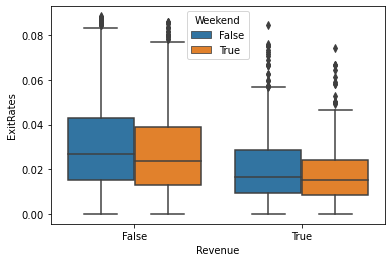

In [158]:
sns.boxplot(x=df['Revenue'],y=df['ExitRates'],hue=df['Weekend'])

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

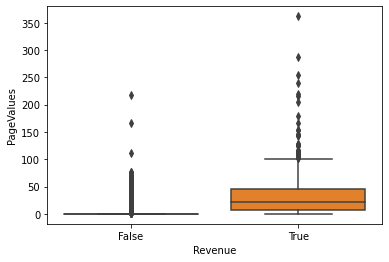

In [159]:
sns.boxplot(x=df['Revenue'],y=df['PageValues'])

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

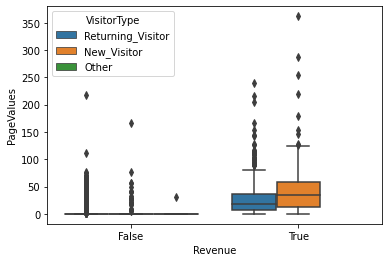

In [160]:
sns.boxplot(x=df['Revenue'],y=df['PageValues'],hue=df['VisitorType'])

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

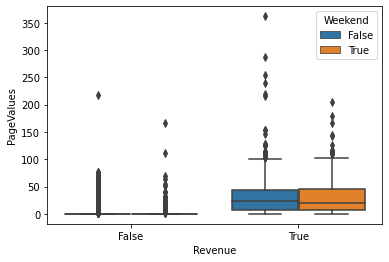

In [161]:
sns.boxplot(x=df['Revenue'],y=df['PageValues'],hue=df['Weekend'])

In [162]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4,0,0.00,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.00,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
9,0,0.00,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False
10,0,0.00,0,0.0,3,395.000000,0.000000,0.066667,0.000000,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
11,0,0.00,0,0.0,16,407.750000,0.018750,0.025833,0.000000,0.4,Feb,1,1,4,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12320,0,0.00,0,0.0,8,143.583333,0.014286,0.050000,0.000000,0.0,Nov,2,2,3,1,Returning_Visitor,False,False
12322,6,76.25,0,0.0,22,1075.250000,0.000000,0.004167,0.000000,0.0,Dec,2,2,4,2,Returning_Visitor,False,False
12324,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12325,3,145.00,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False


In [163]:
le=LabelEncoder()


In [164]:
df['Month']=le.fit_transform(df['Month'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_21848\1456130366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=le.fit_transform(df['Month'])


In [165]:
df['VisitorType']=le.fit_transform(df['VisitorType'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_21848\2547537430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VisitorType']=le.fit_transform(df['VisitorType'])


In [166]:
df['Weekend']=le.fit_transform(df['Weekend'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_21848\429833012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekend']=le.fit_transform(df['Weekend'])


In [167]:
df['Revenue']=le.fit_transform(df['Revenue'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_21848\3135745329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue']=le.fit_transform(df['Revenue'])


In [168]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4,0,0.00,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
5,0,0.00,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,2,2,2,1,3,2,0,0
9,0,0.00,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,2,2,4,1,2,2,0,0
10,0,0.00,0,0.0,3,395.000000,0.000000,0.066667,0.000000,0.0,2,1,1,3,3,2,0,0
11,0,0.00,0,0.0,16,407.750000,0.018750,0.025833,0.000000,0.4,2,1,1,4,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12320,0,0.00,0,0.0,8,143.583333,0.014286,0.050000,0.000000,0.0,7,2,2,3,1,2,0,0
12322,6,76.25,0,0.0,22,1075.250000,0.000000,0.004167,0.000000,0.0,1,2,2,4,2,2,0,0
12324,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,7,2,2,1,1,2,0,0
12325,3,145.00,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0


In [169]:
y=df['Revenue']

In [170]:
X=df.drop('Revenue',axis=1)

In [171]:
df['Revenue'].value_counts()
#imbalance dataset

0    5265
1     957
Name: Revenue, dtype: int64

# SMOTE

In [172]:
from imblearn.over_sampling import SMOTE

In [173]:
smote=SMOTE(sampling_strategy='minority')

In [174]:
X_sm,y_sm=smote.fit_resample(X,y)

In [175]:
X_sm.shape

(10530, 17)

In [176]:
y_sm.shape

(10530,)

In [177]:
sc=StandardScaler()


In [178]:
X=sc.fit_transform(X)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

In [180]:
X_train.shape

(8424, 17)

In [181]:
X_test.shape

(2106, 17)

# LogisticRegression

In [182]:
lr=LogisticRegression()


In [183]:
lr.fit(X_train,y_train)

C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [184]:
y_pred=lr.predict(X_train)


In [185]:
accuracy_score(y_train,y_pred)

0.8594491927825261

In [186]:
y_pred=lr.predict(X_test)


In [187]:
accuracy_score(y_test,y_pred)

0.8580246913580247

In [188]:
KF=KFold(5)

In [189]:
scores=cross_val_score(lr,X,y,cv=KF)

In [190]:
for index,val in enumerate(scores):
    print(index,val)

0 0.9389558232931727
1 0.9349397590361446
2 0.8810289389067524
3 0.860128617363344
4 0.889871382636656


In [191]:
scores.mean()

0.900984904247214

In [192]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1047
           1       0.92      0.79      0.85      1059

    accuracy                           0.86      2106
   macro avg       0.87      0.86      0.86      2106
weighted avg       0.87      0.86      0.86      2106



In [193]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

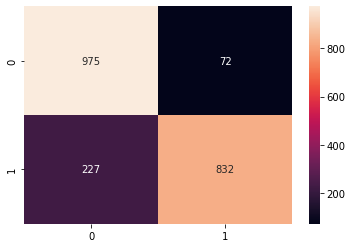

In [194]:
sns.heatmap(data=cm,fmt='d',annot=True)

# RandomForestClassifier

In [195]:
rfc=RandomForestClassifier()


In [196]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [197]:
y_pred=rfc.predict(X_train)


In [198]:
accuracy_score(y_train,y_pred)

1.0

In [199]:
y_pred=rfc.predict(X_test)


In [200]:
accuracy_score(y_test,y_pred)

0.9387464387464387

In [201]:
KF=KFold(5)

In [202]:
scores=cross_val_score(rfc,X,y,cv=KF)

In [203]:
for index,val in enumerate(scores):
    print(index,val)

0 0.9542168674698795
1 0.9413654618473896
2 0.8922829581993569
3 0.8641479099678456
4 0.9091639871382636


In [204]:
scores.mean()

0.9122354369245471

In [205]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1047
           1       0.93      0.95      0.94      1059

    accuracy                           0.94      2106
   macro avg       0.94      0.94      0.94      2106
weighted avg       0.94      0.94      0.94      2106



In [206]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

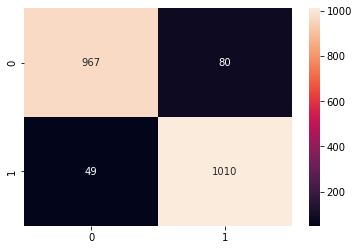

In [207]:
sns.heatmap(data=cm,fmt='d',annot=True)

# DecisionTreeClassifier

In [208]:
dtc=DecisionTreeClassifier()


In [209]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [210]:
y_pred=dtc.predict(X_train)


In [211]:
accuracy_score(y_train,y_pred)

1.0

In [212]:
y_pred=dtc.predict(X_test)


In [213]:
accuracy_score(y_test,y_pred)

0.9031339031339032

In [214]:
KF=KFold(5)

In [215]:
scores=cross_val_score(dtc,X,y,cv=KF)

In [216]:
for index,val in enumerate(scores):
    print(index,val)

0 0.9518072289156626
1 0.927710843373494
2 0.8472668810289389
3 0.8046623794212219
4 0.8456591639871383


In [217]:
scores.mean()

0.8754212993452912

In [218]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1047
           1       0.91      0.90      0.90      1059

    accuracy                           0.90      2106
   macro avg       0.90      0.90      0.90      2106
weighted avg       0.90      0.90      0.90      2106



In [219]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

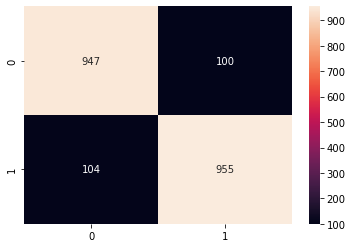

In [220]:
sns.heatmap(data=cm,fmt='d',annot=True)

# XGBClassifier

In [221]:
xgb_i=xgb.XGBClassifier()

In [222]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [223]:
y_pred=xgb_i.predict(X_train)


In [224]:
accuracy_score(y_train,y_pred)

0.99667616334283

In [225]:
y_pred=xgb_i.predict(X_test)


In [226]:
accuracy_score(y_test,y_pred)

0.9430199430199431

In [227]:
KF=KFold(5)

In [228]:
scores=cross_val_score(xgb_i,X,y,cv=KF)

In [229]:
for index,val in enumerate(scores):
    print(index,val)

0 0.9550200803212852
1 0.9429718875502008
2 0.8786173633440515
3 0.8585209003215434
4 0.8906752411575563


In [230]:
scores.mean()

0.9051610945389275

In [231]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1047
           1       0.94      0.95      0.94      1059

    accuracy                           0.94      2106
   macro avg       0.94      0.94      0.94      2106
weighted avg       0.94      0.94      0.94      2106



In [232]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

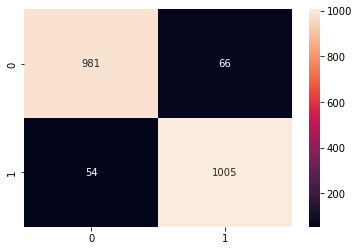

In [233]:
sns.heatmap(data=cm,fmt='d',annot=True)

# KNeighborsClassifier

In [234]:
knc=KNeighborsClassifier()


In [235]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [236]:
y_pred=knc.predict(X_train)


In [237]:
accuracy_score(y_train,y_pred)

0.9202279202279202

In [238]:
y_pred=knc.predict(X_test)


In [239]:
accuracy_score(y_test,y_pred)

0.8732193732193733

In [240]:
KF=KFold(5)

In [241]:
scores=cross_val_score(knc,X,y,cv=KF)

In [242]:
for index,val in enumerate(scores):
    print(index,val)

0 0.9309236947791165
1 0.9220883534136546
2 0.8657556270096463
3 0.8392282958199357
4 0.8778135048231511


In [243]:
scores.mean()

0.8871618951691008

In [244]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1047
           1       0.83      0.95      0.88      1059

    accuracy                           0.87      2106
   macro avg       0.88      0.87      0.87      2106
weighted avg       0.88      0.87      0.87      2106



In [245]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

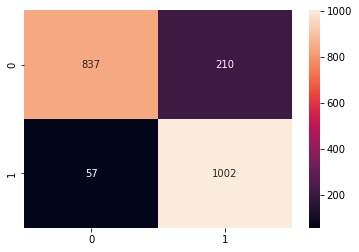

In [246]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [247]:
import tensorflow as tf

In [248]:
from tensorflow import keras

In [249]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(17,),activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

In [250]:
model.compile(
optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy'])

In [251]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
264/264 [==============================] - 1s 2ms/step - loss: 9.7271 - accuracy: 0.6554
Epoch 2/10
264/264 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.8586
Epoch 3/10
264/264 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.8632
Epoch 4/10
264/264 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.8504
Epoch 5/10
264/264 [==============================] - 0s 2ms/step - loss: 0.4678 - accuracy: 0.8464
Epoch 6/10
264/264 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.8426
Epoch 7/10
264/264 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.8361
Epoch 8/10
264/264 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8479
Epoch 9/10
264/264 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.8381
Epoch 10/10
264/264 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.8432

In [252]:
model.evaluate(X_test,y_test)

66/66 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.8305


[0.44786524772644043, 0.8304843306541443]

In [253]:
y_pred=model.predict(X_test)


66/66 [==============================] - 0s 966us/step


In [254]:
y_pred

array([[0.9677714 ],
       [0.7473862 ],
       [0.67262155],
       ...,
       [0.9470731 ],
       [0.9281561 ],
       [0.33082804]], dtype=float32)

In [255]:
ypred=[]

def Convert():
    for i in y_pred:
        if i<0.5:
            ypred.append(0)
        else:
            ypred.append(1)
    

In [256]:
Convert()

In [257]:
ypred[:10]

[1, 1, 1, 0, 0, 1, 1, 1, 1, 1]

In [258]:
y_test[:10]

4228    1
2128    0
1408    0
5396    0
2870    0
8089    1
6684    1
3902    1
7768    1
3647    0
Name: Revenue, dtype: int64

In [259]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=ypred)

<AxesSubplot:>

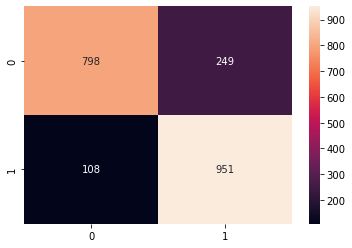

In [260]:
sns.heatmap(data=cm,annot=True,fmt="d")

In [261]:
print(classification_report(y_test,ypred))


              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1047
           1       0.79      0.90      0.84      1059

    accuracy                           0.83      2106
   macro avg       0.84      0.83      0.83      2106
weighted avg       0.84      0.83      0.83      2106

